In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/regresi_kotak.zip

In [ ]:
import pandas as pd
import numpy as np
import glob

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/regresi_kotak.csv')
data

,file,x1,y1,x2,y2
0,0.jpg,0,0,80,103
1,1.jpg,22,0,196,97
2,2.jpg,176,120,194,138
3,3.jpg,161,0,199,54
4,4.jpg,26,0,199,120
...,...,...,...,...,...
495,495.jpg,71,77,95,101
496,496.jpg,72,0,182,90
497,497.jpg,70,57,199,199
498,498.jpg,30,58,199,199


In [ ]:
data = data.values

[0 0 80 103]


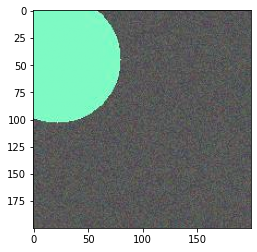

In [ ]:
import cv2
import matplotlib.pyplot as plt

x = []
y = []
for i in range(data.shape[0]):
  _ = cv2.imread('ini/'+data[i,0])
  _ = _/255
  x.append(_)
  y.append(data[i,1:])

plt.imshow(x[0])
print(y[0])
y=np.asarray(y).astype(int)

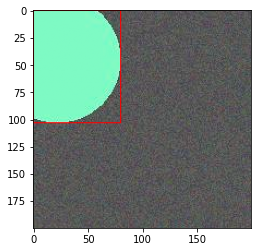

In [ ]:
plt.imshow(
    cv2.rectangle(x[0],
    (y[0,0],y[0,1]),
    (y[0,2],y[0,3]),
    (255,0,0),1)
)

In [ ]:
import random
z = list(zip(x,y))
random.shuffle(z)
x,y = zip(*z)
x = np.asarray(x)
y = np.asarray(y).astype(float)

In [ ]:
x.shape

(500, 200, 200, 3)

In [ ]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose, Conv2D
from keras.layers.serialization import activation
from keras.layers import Reshape, Flatten, Dense, MaxPooling1D, MaxPooling2D, MaxPooling3D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(8,(3,3),input_shape=x.shape[1:], activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(4, activation='linear'))
model.compile(optimizer='adam',loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)      

In [ ]:
history = model.fit(x,y, batch_size=2, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 20s 99ms/step - loss: 10441.4629 - mae: 57.9204 - val_loss: 2814.7815 - val_mae: 43.2517
Epoch 2/10
200/200 [==============================] - 19s 95ms/step - loss: 2870.3181 - mae: 42.3297 - val_loss: 2249.2344 - val_mae: 38.6279
Epoch 3/10
200/200 [==============================] - 20s 102ms/step - loss: 1998.6033 - mae: 34.4363 - val_loss: 1500.6715 - val_mae: 29.6252
Epoch 4/10
200/200 [==============================] - 22s 113ms/step - loss: 1535.9302 - mae: 29.8515 - val_loss: 1303.3440 - val_mae: 27.7007
Epoch 5/10
200/200 [==============================] - 19s 96ms/step - loss: 1273.3300 - mae: 26.8313 - val_loss: 957.0506 - val_mae: 22.9857
Epoch 6/10
200/200 [==============================] - 19s 96ms/step - loss: 1116.2153 - mae: 25.2781 - val_loss: 902.6353 - val_mae: 22.1961
Epoch 7/10
200/200 [==============================] - 21s 103ms/step - loss: 907.8033 - mae: 22.2295 - val_loss: 795.7582 - val_mae: 20.9236
Epoch 

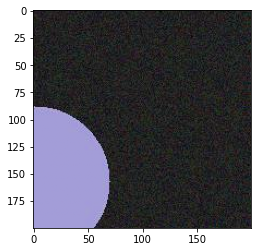

In [ ]:
plt.imshow(x[10])

In [ ]:
x_test = []
x_test.append(x[10])
x_test = np.asarray(x_test)

y_pred = model.predict(x_test)
y_pred = y_pred.astype(int)
y_pred

1/1 [==============================] - 0s 158ms/step


array([[ -6, 111,  58, 192]])

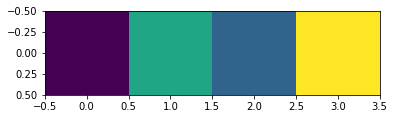

In [ ]:
plt.imshow(y_pred)

In [ ]:
encoder = Sequential()
encoder.add(Conv2D(8,(3,3)))
encoder.add(MaxPooling2D(2,2))
encoder.add(Conv2D(16,(3,3)))
encoder.add(MaxPooling2D(2,2))
encoder.add(Flatten())

output_1 = Sequential()
output_1.add(Dense(2, activation='linear'))

output_2 = Sequential()
output_2.add(Dense(2, activation='linear'))

output_3 = Sequential()
output_3.add(Dense(1, activation='linear'))

output_4 = Sequential()
output_4.add(Dense(1, activation='linear'))

In [ ]:
from keras.models import Model

class SCNet(Model):
  def __init__(self):
    super(SCNet,self).__init__()
    self.encoder = encoder
    self.output_1 = output_1
    self.output_2 = output_2
    self.output_3 = output_3
    self.output_4 = output_4
  def call(self, x):
    output = self.encoder(x)
    y1 = self.output_1(output)
    y2 = self.output_2(output)
    y3 = self.output_3(output)
    y4 = self.output_4(output)
    return [y1,y2,y3,y4]

In [ ]:
sc = SCNet()
sc.compile(optimizer = 'adam', loss =['mse', 'mse','binary_crossentropy', 'mse'],metrics=['mse', 'mse', 'accuracy', 'mse'] )

In [ ]:
sc.predict(np.zeros((1,100,100,3)))

1/1 [==============================] - 0s 419ms/step


[array([[0., 0.]], dtype=float32),
 array([[0., 0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32)]

In [ ]:
sc.summary()

Model: "sc_net_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 8464)              1392      
                                                                 
 sequential_12 (Sequential)  (None, 2)                 16930     
                                                                 
 sequential_13 (Sequential)  (None, 2)                 16930     
                                                                 
 sequential_14 (Sequential)  (None, 1)                 8465      
                                                                 
 sequential_15 (Sequential)  (None, 1)                 8465      
                                                                 
Total params: 52,182
Trainable params: 52,182
Non-trainable params: 0
_________________________________________________________________
